# TP séance 7 - Arbres et plus courts chemins
L'objectif de ce TP est d'implémenter les algorithmes de Kruskal, Prim et Dijkstra vus en cours.
L'algorithme de Dijkstra sera utilisé pour un problème concret : calculer le meilleur itinéraire entre deux points d'une ville, et l'afficher sur une carte.

In [3]:
import networkx as nx
import random
import matplotlib.pyplot as plt

## Exercice 1 : algorithme de Kruskal


### Q.1
Utilisez les fonctions de NetworkX pour générer des graphes aléatoires *pondérés*, et afficher les poids des arêtes sur le graphe ; vous pourrez utiliser un graphe de type $G_{n,m}$, avec environ 1,5 fois plus d'arêtes que de sommets.

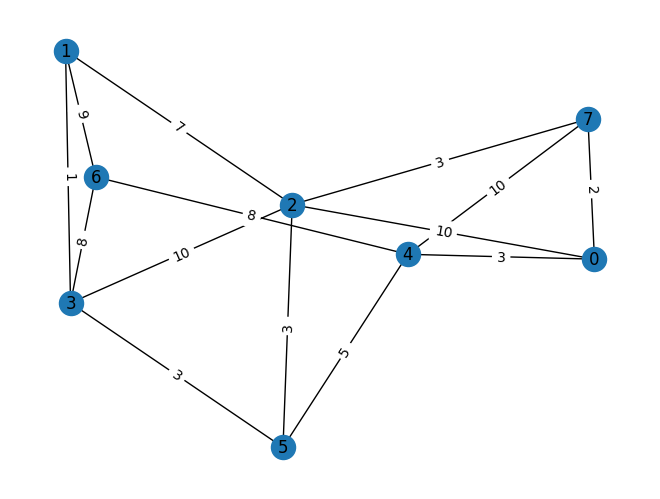

In [29]:
def random_graph():
    n = random.randint(7,10)
    m = random.randint(round(1.3*n),round(1.7*n))

    # Création du graphe aléatoire pondéré
    G = nx.gnm_random_graph(n, m)

    # Attribution de poids aléatoires aux arêtes
    for (u, v) in G.edges():
        G.edges[u, v]['weight'] = random.randint(1, 10)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    
    return G

G=random_graph()

#plt.show() décommenter si on souhaite se débarasser de la liste des arêtes


### Q.2 
Implémentez l'algorithme de Kruskal et testez-le sur un graphe pondéré aléatoire, d'abord en affichant la *liste* des arêtes de l'arbre couvrant de poids minimum, puis en mettant en évidence ces arêtes sur le graphe. Comment détecter / empêcher la formation d'un cycle ?

## Exercice 2 : algorithme de Prim
Implémentez l'algorithme de Prim ; pensez à le tester également !

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Edge : Weight

0-6:4
6-3:1
3-7:4
6-8:4
3-1:5
1-2:5
1-5:6
0-4:7


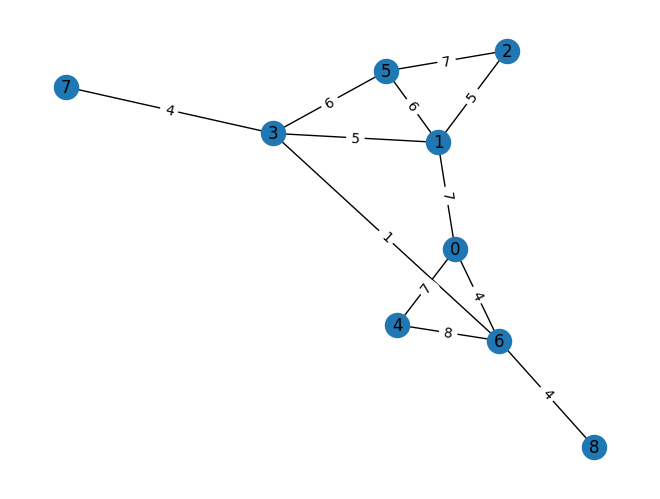

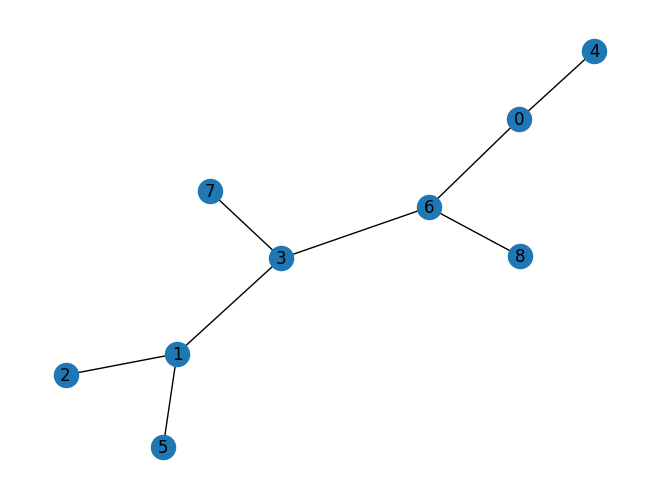

In [31]:
#"Petite" aide je l'avoue d'internet .....

G = random_graph()

mat = nx.adjacency_matrix(G).todense()

#liste de taille n de 0:
selected_node = [0] * len(G.edges())
print(selected_node)

no_edge = 0

selected_node[0] = True

T =  nx.Graph()
lst=[]

# printing for edge and weight
print("Edge : Weight\n")
while (no_edge < len(G.edges()) - 1):
    minimum = 9999999
    a = 0
    b = 0
    for m in range(len(G.edges())):
        if selected_node[m]:
            for n in range(len(G.edges())):
                if ((not selected_node[n]) and G.has_edge(m,n)):  
                    # not in selected and there is an edge
                    if minimum > mat[m,n]:
                        minimum = mat[m,n]
                        a = m
                        b = n
    if (a != b):
        print(str(a) + "-" + str(b) + ":" + str(mat[a,b]))
        lst.append((a,b))
    selected_node[b] = True
    no_edge += 1
T.add_edges_from(lst)
plt.figure(2)
nx.draw(T, with_labels=True)


## Exercice 3 : Algorithme de Dijkstra
Ecrivez une fonction `dijkstra(G, s, d)` qui prend un graphe pondéré en entrée, et calcule le plus court chemin du sommet source `s` vers le sommet destination `d`. Votre fonction doit retourner **la longueur de l'itinéraire (en m)** ainsi que **la liste des sommets permettant de reconstituer l'itinéraire**. Testez cette fonction sur un graphe aléatoire.

In [28]:
#marche pas ........................................................................................................................

from collections import defaultdict
import heapq as heap

def dijkstra(G, startingNode):
	visited = set()
	parentsMap = {}
	pq = []
	nodeCosts = defaultdict(lambda: float('inf'))
	nodeCosts[startingNode] = 0
	heap.heappush(pq, (0, startingNode))
 
	while pq:
		# go greedily by always extending the shorter cost nodes first
		_, node = heap.heappop(pq)
		visited.add(node)
 
		for adjNode, weight in G[node].items():
			if adjNode in visited:	continue
				
			newCost = nodeCosts[node] + weight
			if nodeCosts[adjNode] > newCost:
				parentsMap[adjNode] = node
				nodeCosts[adjNode] = newCost
				heap.heappush(pq, (newCost, adjNode))
        
	return parentsMap, nodeCosts


dijkstra(G,0)

TypeError: unsupported operand type(s) for +: 'int' and 'dict'

## Exercice 4 : Application au calcul d'itinéraire
[OSMnx](https://geoffboeing.com/2016/11/osmnx-python-street-networks/) est un package Python permettant d'exploiter au format NetworkX les données disponibles sur [OpenStreetMap](https://openstreetmap.org). Il permet notamment de récupérer toutes les informations du réseau routier, piéton, de transports en commun, etc. et de le manipuler avec NetworkX. De nombreux exemples sont disponibles [sur cette page](https://github.com/gboeing/osmnx-examples).

Google Colaboratory permet d'exécuter des notebooks sur lesquels OSMnx et toutes ses dépendances sont installées.

**Note** : Vous pouvez aussi bien sûr travailler en local, mais il vous faudra installer OSMnx et toutes ses dépendances.

On commence par installer la librairie OSMnx :

*Edit 2023 : la version 1.24 de `numpy` pose problème dans Colab ; on force l'installation de la version 1.23*

In [ ]:
%pip install numpy==1.23
%pip install osmnx

On importe ensuite les paquets nécessaires :

In [ ]:
import networkx as nx
import osmnx as ox

%matplotlib inline
ox.config(log_console=True)

*A partir de maintenant, toutes les informations, fonctions... sont à chercher dans les documentations fournies au début de cette section.*

**Affichez le réseau routier de Lyon :**

Par défaut, les sommets sont affichés ; quand ils sont trop nombreux, ils nuisent à la lisibilité du graphe. **Affichez de nouveau le réseau routier, en jaune, dans une image de taille 10x10, et sans afficher les sommets.**

**Combien de sommets et d'arêtes ce graphes comporte-t-il ?**



**Superposez le réseau routier sur une carte de Lyon** (il existe une fonction d'affichage d'OSMnx pour ça ;)) ; **faites-en sorte que le nom d'une rue soit affiché quand on clique dessus**.

A présent, l'idée est de déterminer le plus court chemin entre les deux points géographiques fournis, à l'aide de l'algorithme de Dijkstra codé ci-dessus, et de l'afficher sur la carte.

Les *numéros* des sommets donnés par OpenStreetMap sont ceux de sa base de données *mondiale* : il peuvent être très grands (de l'ordre du milliard pour certains) et surtout ne pas être consécutifs. **Si besoin, modifiez votre fonction `dijkstra` pour qu'elle puisse gérer des numéros de sommets quelconques.**

La fonction `nearest_nodes` renvoie le sommet / noeud du graphe le plus proche des coordonnées géographiques (longitude, latitude) données en paramètre. Récupérez les coordonnées des deux points géographiques fournis (via Google Maps, ou [OpenStreetMap](https://www.openstreetmap.org) en faisant un clic-droit puis *Affichez l'adresse*) et affichez les numéros des sommets les plus proches.

Appliquez votre fonction `dijkstra` aux deux sommets du graphe, puis superposez en rouge l'itinéraire obtenu :